# Final Project: Parameter Mapping Sonification

# Group Members: James Nguyen, Julian Liaw

In [2]:
import librosa
import librosa.display
import pandas as pd
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

# Load Data File


In [3]:
data = pd.read_csv('DATA/warriorsceltics.csv', low_memory=False)
data.head()

,Unnamed: 0,Date,Home Team,Away Team,Win or Loss for Celtics,Win or Loss for Warriors,Celtics score,Warriors score,Streak
0,0,"Mar 16, 2022",Warriors,Celtics,W,L,110,88,Celtics won 1
1,1,"Dec 17, 2021",Celtics,Warriors,L,W,107,111,Warriors won 1
2,2,"Apr 17, 2021",Celtics,Warriors,W,L,119,114,Celtics won 5
3,3,"Feb 2, 2021",Warriors,Celtics,W,L,111,107,Celtics won 4
4,4,"Jan 30, 2020",Celtics,Warriors,W,L,119,104,Celtics won 3


# Format for Audio Playback


In [4]:
data.shape

# get the first column of data...
wave = data.iloc[:, 6]

print(wave.shape)

(346,)


In [5]:
import math

def normalize(x, dB):

    ampMax = numpy.amax(abs(x))
    ampTarget = math.pow(10, dB / 20)     
    normFactor = ampTarget / ampMax 
    
    # Return the normalized signal.
    return x * normFactor

In [11]:
wave = normalize(wave, -3)

sr = 325 # sample rate
ipd.Audio(wave, rate=sr)

# Export the Audio


In [12]:
import soundfile as sf
sf.write('DATA/warriorsceltics.wav', wave, sr, 'PCM_24')

In [14]:
x, sr = librosa.load('DATA/warriorsceltics.wav')
print(x.shape)
print(sr)
print(librosa.get_duration(x, sr))

(23475,)
22050
1.064625850340136


/var/folders/zz/4rbbqf5d1mvbsgp0hsws8kd00000gn/T/ipykernel_7836/2030000725.py:4: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.01249622 0.01017814 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  print(librosa.get_duration(x, sr))


# Plot the Waveform


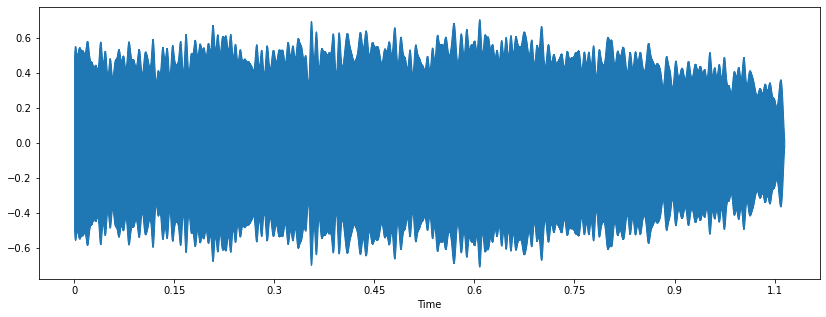

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# Feature Extraction

In [16]:
def extract_features(signal):
    return [
        librosa.feature.spectral_centroid(signal)[0, 0],
        librosa.feature.spectral_rolloff(signal)[0, 0],
        librosa.feature.spectral_contrast(signal)[0, 0],
    ]

In [17]:
audio_features = numpy.array([extract_features(x[i: i + 2048]) for i in range(0, len(x), 2048)]) 

/var/folders/zz/4rbbqf5d1mvbsgp0hsws8kd00000gn/T/ipykernel_7836/3336989843.py:3: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.43521345 0.4357325  0.4362915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.feature.spectral_centroid(signal)[0, 0],
/var/folders/zz/4rbbqf5d1mvbsgp0hsws8kd00000gn/T/ipykernel_7836/3336989843.py:4: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.43521345 0.4357325  0.4362915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.feature.spectral_rolloff(signal)[0, 0],
/var/folders/zz/4rbbqf5d1mvbsgp0hsws8kd00000gn/T/ipykernel_7836/3336989843.py:5: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.43521345 0.4357325  0.4362915 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.feature.spectral_contrast(signal)[0, 0],
/var/folders/zz/4rbbqf5d1mvbsgp0

# Feature 1: Spectral Centroid

Text(0, 0.5, 'Count')

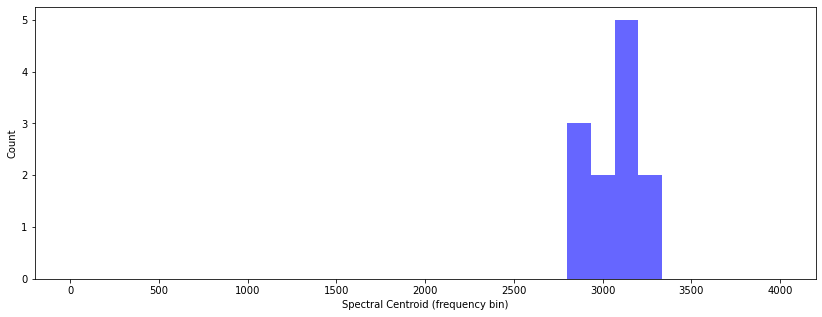

In [18]:
plt.figure(figsize=(14, 5))
plt.hist(audio_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

# Feature 2: Spectral Rolloff

In [19]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

/var/folders/zz/4rbbqf5d1mvbsgp0hsws8kd00000gn/T/ipykernel_7836/3608151521.py:1: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.01249622 0.01017814 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


/var/folders/zz/4rbbqf5d1mvbsgp0hsws8kd00000gn/T/ipykernel_7836/1087900744.py:2: FutureWarning: Pass y=[0.49642956 0.5007767  0.50497454 ... 0.02249622 0.02017814 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


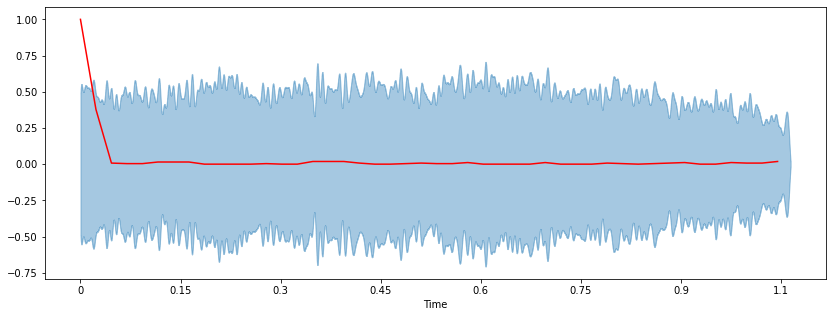

In [20]:
plt.figure(figsize=(14, 5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

# Feature 3: Spectral Contrast

In [21]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)
spectral_contrast.shape

/var/folders/zz/4rbbqf5d1mvbsgp0hsws8kd00000gn/T/ipykernel_7836/3656958463.py:1: FutureWarning: Pass y=[0.48642957 0.4907767  0.49497452 ... 0.01249622 0.01017814 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)


(7, 46)

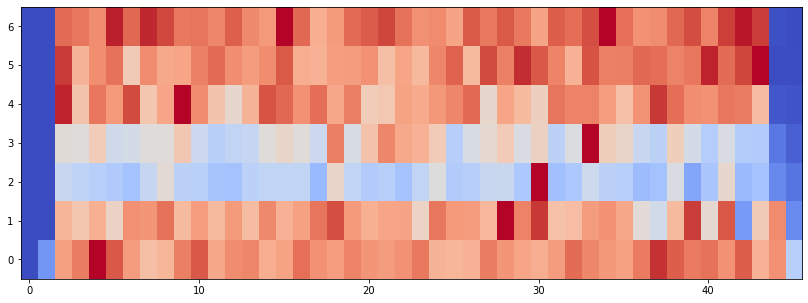

In [22]:
plt.figure(figsize=(14, 5))
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm',)